In [1]:
import pandas as pd 
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_csv('train_1.csv')
exog = pd.read_csv('Exog_Campaign_eng.csv')

In [3]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [4]:
exog.head()

,Exog
0,0
1,0
2,0
3,0
4,0


In [5]:
df.describe()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
count,1.243230e+05,1.242470e+05,1.245190e+05,1.244090e+05,1.244040e+05,1.245800e+05,1.243990e+05,1.247690e+05,1.248190e+05,1.247210e+05,...,1.412100e+05,1.414790e+05,1.418740e+05,1.413190e+05,1.411450e+05,1.413620e+05,1.412410e+05,1.412370e+05,1.414280e+05,1.415980e+05
mean,1.195857e+03,1.204004e+03,1.133676e+03,1.170437e+03,1.217769e+03,1.290273e+03,1.239137e+03,1.193092e+03,1.197992e+03,1.189651e+03,...,1.394096e+03,1.377482e+03,1.393099e+03,1.523740e+03,1.679607e+03,1.678302e+03,1.633966e+03,1.684308e+03,1.467943e+03,1.478282e+03
std,7.275352e+04,7.421515e+04,6.961022e+04,7.257351e+04,7.379612e+04,8.054448e+04,7.576288e+04,6.820002e+04,7.149717e+04,7.214536e+04,...,8.574880e+04,7.732794e+04,8.478533e+04,8.752210e+04,9.794534e+04,9.232482e+04,9.185831e+04,9.014266e+04,8.155481e+04,8.873567e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.300000e+01,1.300000e+01,1.200000e+01,1.300000e+01,1.400000e+01,1.100000e+01,1.300000e+01,1.300000e+01,1.400000e+01,1.400000e+01,...,2.200000e+01,2.200000e+01,2.000000e+01,2.100000e+01,2.200000e+01,2.300000e+01,2.400000e+01,2.300000e+01,2.300000e+01,2.100000e+01
50%,1.090000e+02,1.080000e+02,1.050000e+02,1.050000e+02,1.130000e+02,1.130000e+02,1.150000e+02,1.170000e+02,1.150000e+02,1.130000e+02,...,1.490000e+02,1.430000e+02,1.320000e+02,1.450000e+02,1.600000e+02,1.620000e+02,1.630000e+02,1.600000e+02,1.540000e+02,1.360000e+02
75%,5.240000e+02,5.190000e+02,5.040000e+02,4.870000e+02,5.400000e+02,5.550000e+02,5.510000e+02,5.540000e+02,5.490000e+02,5.450000e+02,...,6.070000e+02,5.980000e+02,5.690000e+02,6.280000e+02,6.590000e+02,6.680000e+02,6.540000e+02,6.490000e+02,6.350000e+02,5.610000e+02
max,2.038124e+07,2.075219e+07,1.957397e+07,2.043964e+07,2.077211e+07,2.254467e+07,2.121089e+07,1.910791e+07,1.999385e+07,2.020182e+07,...,2.420108e+07,2.253925e+07,2.505662e+07,2.586575e+07,2.834288e+07,2.691699e+07,2.702505e+07,2.607382e+07,2.436397e+07,2.614954e+07


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [7]:
df.isnull().sum()

Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
2016-12-27     3701
2016-12-28     3822
2016-12-29     3826
2016-12-30     3635
2016-12-31     3465
Length: 551, dtype: int64

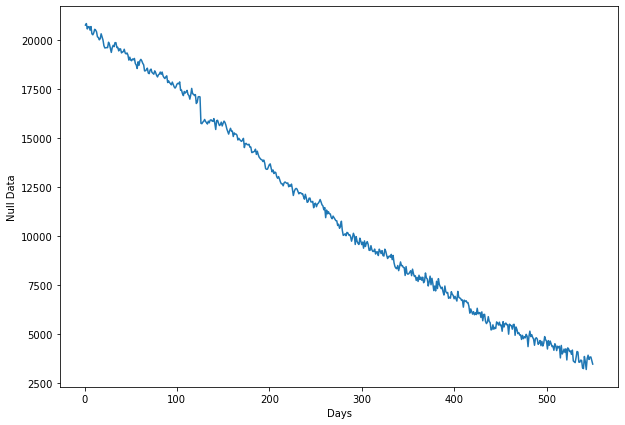

In [8]:
days = [i for i in range(1,len(df.columns))]
plt.figure(figsize=(10,7))
plt.xlabel('Days')
plt.ylabel('Null Data')
plt.plot(days,df.isnull().sum()[1:])

In the above graph we can see the null values are decreasing with time this may be because at the starting some of the pages did not exist and with time they were created and had visits so we can replace them with 0

In [9]:
#Dropping all the rows which has only null
print(df.shape)
df = df.dropna(how='all')
print(df.shape)

(145063, 551)
(145063, 551)


In [10]:
#Dropping all the rows having significant amount of nulls here we have taken the thresold as 300
df = df.dropna(thresh=300)
df.shape

(133617, 551)

We have not loose many records so its better now

In [11]:
#Filling the nulls with 0 as discussed above 
df = df.fillna(0)

In [12]:
# Checking another way of fetching the language out of the string
def lang(Page):
    val = re.search('[a-z][a-z].wikipedia.org',Page)
    if val:
        return val[0][0:2]
    return 'no_lang'
df['Language']=df['Page'].apply(lambda x: lang(str(x)))

In [13]:
#Need to extract the LANGUAGE,ACCESS  and all details from the Page text and create new columns for better understanding
def split_page(text):
    w = re.split('_|\.',text)
    return ''.join(w[:-5]),w[-2],w[-1]

li = list(df.Page.apply(lambda x: split_page(str(x))))
df_new = pd.DataFrame(li)
df_new.columns = ['Title','Access_Type','Access_Origin']
df_new = pd.concat([df,df_new],axis=1)

In [14]:
df_new.groupby('Language').count()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Title,Access_Type,Access_Origin
Language,,,,,,,,,,,,,,,,,,,,,
de,17362,17362,17362,17362,17362,17362,17362,17362,17362,17362,...,17362,17362,17362,17362,17362,17362,17362,13046,13046,13046
en,22486,22486,22486,22486,22486,22486,22486,22486,22486,22486,...,22486,22486,22486,22486,22486,22486,22486,22486,22486,22486
es,13551,13551,13551,13551,13551,13551,13551,13551,13551,13551,...,13551,13551,13551,13551,13551,13551,13551,10142,10142,10142
fr,16948,16948,16948,16948,16948,16948,16948,16948,16948,16948,...,16948,16948,16948,16948,16948,16948,16948,16948,16948,16948
ja,19295,19295,19295,19295,19295,19295,19295,19295,19295,19295,...,19295,19295,19295,19295,19295,19295,19295,16140,16140,16140
no_lang,14494,14494,14494,14494,14494,14494,14494,14494,14494,14494,...,14494,14494,14494,14494,14494,14494,14494,14494,14494,14494
ru,14270,14270,14270,14270,14270,14270,14270,14270,14270,14270,...,14270,14270,14270,14270,14270,14270,14270,14270,14270,14270
zh,15211,15211,15211,15211,15211,15211,15211,15211,15211,15211,...,15211,15211,15211,15211,15211,15211,15211,15211,15211,15211


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Language', ylabel='count'>

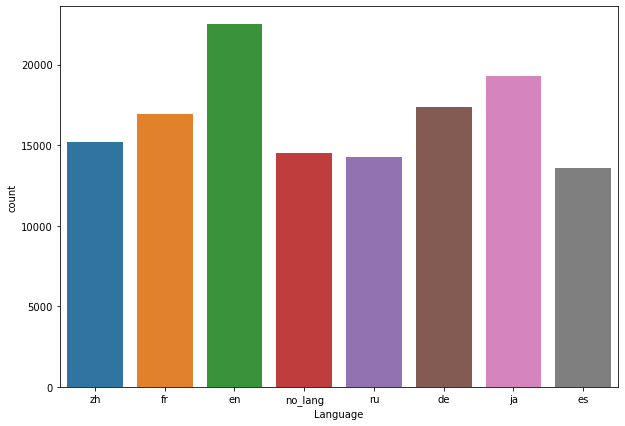

In [15]:
#LANGUAGE being an important factor here lets see the counts of different language here
plt.figure(figsize=(10,7))
sns.countplot(df_new['Language'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Access_Type', ylabel='count'>

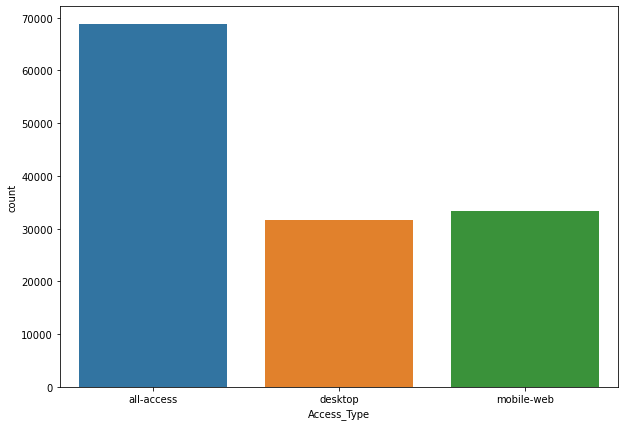

In [16]:
#Lets check the same for Access Type also
plt.figure(figsize=(10,7))
sns.countplot(df_new['Access_Type'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Access_Origin', ylabel='count'>

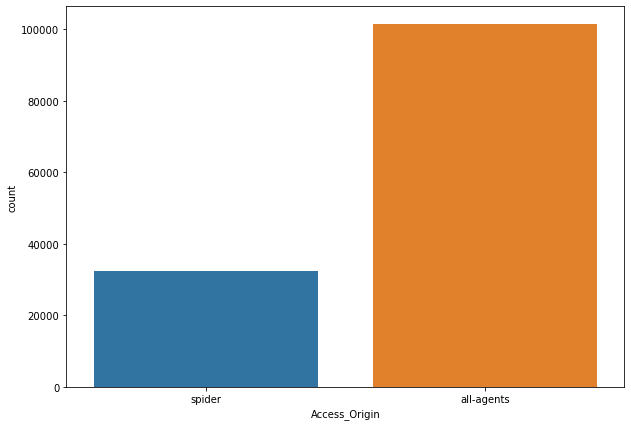

In [17]:
#Lets check the same for Access Origin  also
plt.figure(figsize=(10,7))
sns.countplot(df_new['Access_Origin'])

In [18]:
#Checking the mean counts of page visitors for each language
df_language=df_new.groupby('Language').mean().transpose()
df_language

Language,de,en,es,fr,ja,no_lang,ru,zh
2015-07-01,763.765926,3767.328604,1127.485204,499.092872,614.637160,102.733545,663.199229,272.498521
2015-07-02,753.362861,3755.158765,1077.485425,502.297852,705.813216,107.663447,674.677015,272.906778
2015-07-03,723.074415,3565.225696,990.895949,483.007553,637.451671,101.769629,625.329783,271.097167
2015-07-04,663.537323,3711.782932,930.303151,516.275785,800.897435,86.853871,588.171829,273.712379
2015-07-05,771.358657,3833.433025,1011.759575,506.871666,768.352319,96.254105,626.385354,291.977713
...,...,...,...,...,...,...,...,...
2016-12-27,1119.596936,6314.335275,1070.923400,840.590217,808.541436,155.270181,998.374071,363.066991
2016-12-28,1062.284069,6108.874144,1108.996753,783.585379,807.430163,178.561267,945.054730,369.049701
2016-12-29,1033.939062,6518.058525,1058.660320,763.209169,883.752786,150.873534,909.352207,340.526330
2016-12-30,981.786430,5401.792360,807.551177,710.502773,979.278777,156.049193,815.475123,342.745316


In [19]:
df_language.reset_index(inplace=True)

In [20]:
df_language.set_index('index',inplace=True)

In [21]:
df_language

Language,de,en,es,fr,ja,no_lang,ru,zh
index,,,,,,,,
2015-07-01,763.765926,3767.328604,1127.485204,499.092872,614.637160,102.733545,663.199229,272.498521
2015-07-02,753.362861,3755.158765,1077.485425,502.297852,705.813216,107.663447,674.677015,272.906778
2015-07-03,723.074415,3565.225696,990.895949,483.007553,637.451671,101.769629,625.329783,271.097167
2015-07-04,663.537323,3711.782932,930.303151,516.275785,800.897435,86.853871,588.171829,273.712379
2015-07-05,771.358657,3833.433025,1011.759575,506.871666,768.352319,96.254105,626.385354,291.977713
...,...,...,...,...,...,...,...,...
2016-12-27,1119.596936,6314.335275,1070.923400,840.590217,808.541436,155.270181,998.374071,363.066991
2016-12-28,1062.284069,6108.874144,1108.996753,783.585379,807.430163,178.561267,945.054730,369.049701
2016-12-29,1033.939062,6518.058525,1058.660320,763.209169,883.752786,150.873534,909.352207,340.526330


Text(0, 0.5, 'Views Per Page')

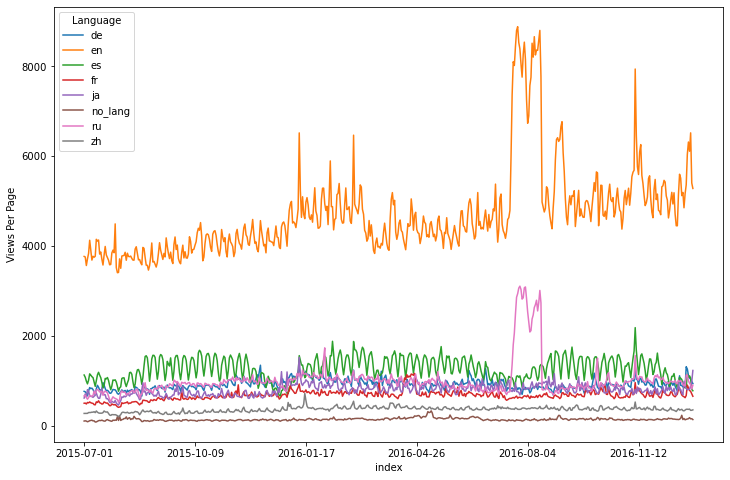

In [22]:
#The graph which shows the views per pages based on the timeline shoes English lang as the most viewed page
df_language.plot(figsize=(12,8))
plt.ylabel('Views Per Page')

In [23]:
result = adfuller(df_language['en'])

print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

ADF Statistic: -2.37356297456994
p-value: 0.14933749437355337
Critical Values: {'1%': -3.4426321555520905, '5%': -2.86695748394138, '10%': -2.5696553279762426}


In [24]:
data=df_language['en']

Above we can see the p_value is notless than 0.05 so we can confirm that it is not stationary so in further steps we need to make it stationary

In [25]:
#Lets decompose the data and see 
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data.values, model='multiplicative',period = 7)


In [26]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

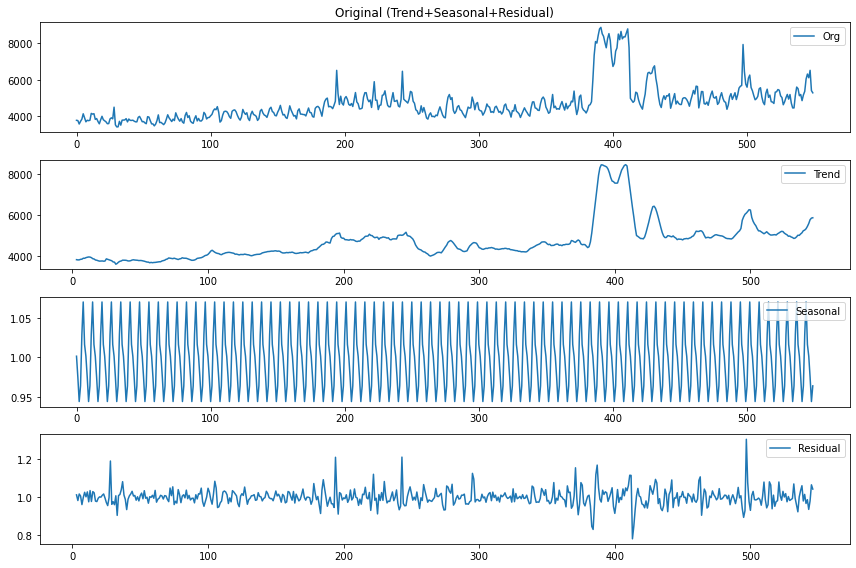

In [27]:
#We will plot all the graphs of trend,season and residuals along with the original data
plt.figure(figsize=(12,8))
plt.subplot(4,1,1)
plt.title('Original (Trend+Seasonal+Residual)')
plt.plot(data.values,label='Org')
plt.legend(loc='best')
plt.subplot(4,1,2)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(4,1,3)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(4,1,4)
plt.plot(residual,label='Residual')
plt.legend(loc='best')
plt.tight_layout()

In [28]:
result = adfuller(pd.DataFrame(residual).fillna(0)[0])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

ADF Statistic: -3.796319938831731
p-value: 0.0029451920490323035
Critical Values: {'1%': -3.4424279871882573, '5%': -2.8668676073304407, '10%': -2.569607433093642}


As here we can see the p value is < 0.05 we can finally conclude that our data is stationary and now we can apply our models 

In [29]:
ts = pd.DataFrame(residual).fillna(0)[0]

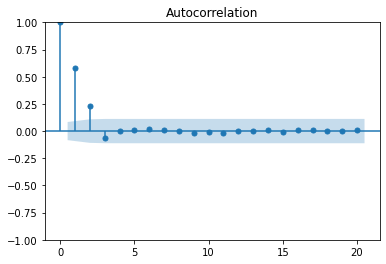

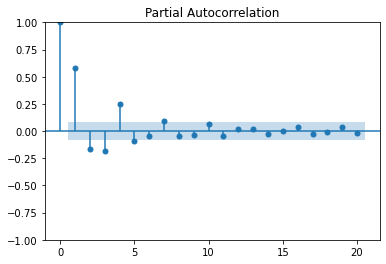

In [30]:
#ACF & PACF
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf=plot_acf(ts,lags=20)
pacf=plot_pacf(ts,lags=20)

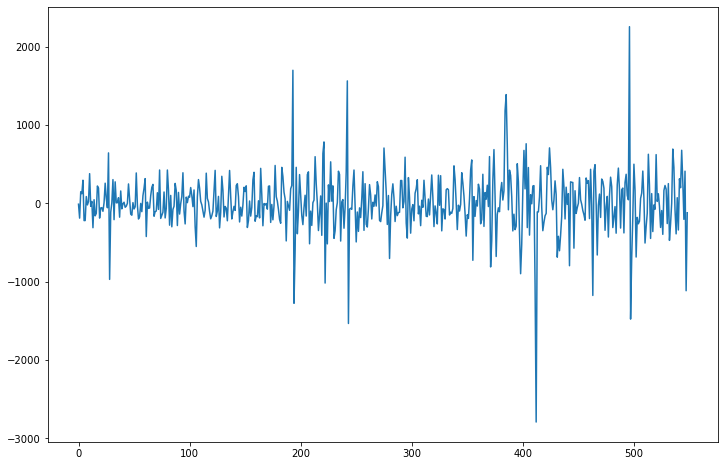

In [31]:
#USING DIFFERENCING METHOD TO MAKE IT STATIONARY
en_lng_all = df_language['en']
diff = en_lng_all.diff(1)
diff.dropna(inplace=True)
plt.figure(figsize=(12,8))
plt.plot(diff.values)
plt.show()

In [32]:
#CHECK IF THE ABOVE IS STATIONARY OR NOT
# diff = pd.Series(diff)
result = adfuller(diff)
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

ADF Statistic: -8.273590058493813
p-value: 4.721271966433727e-13
Critical Values: {'1%': -3.4426321555520905, '5%': -2.86695748394138, '10%': -2.5696553279762426}


The value is < 0.05 so we can say that now this is also stationary

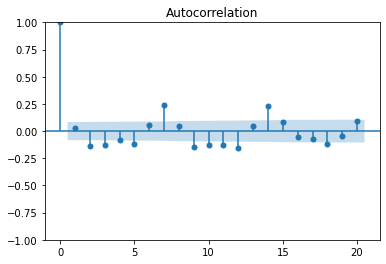

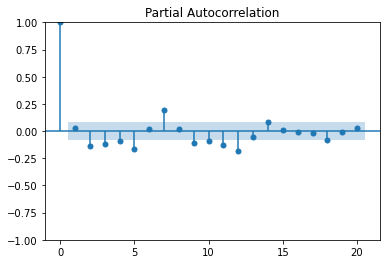

In [33]:
#ACF AND PACF based on this method 
acf=plot_acf(diff,lags=20)
pacf=plot_pacf(diff,lags=20)

In [34]:
#LETS START WITH ARIMA MODEL
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(en_lng_all,order=(2,1,3))
model_fit = model.fit()

C:\Users\SAKUMARDASH\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\SAKUMARDASH\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\SAKUMARDASH\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\SAKUMARDASH\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


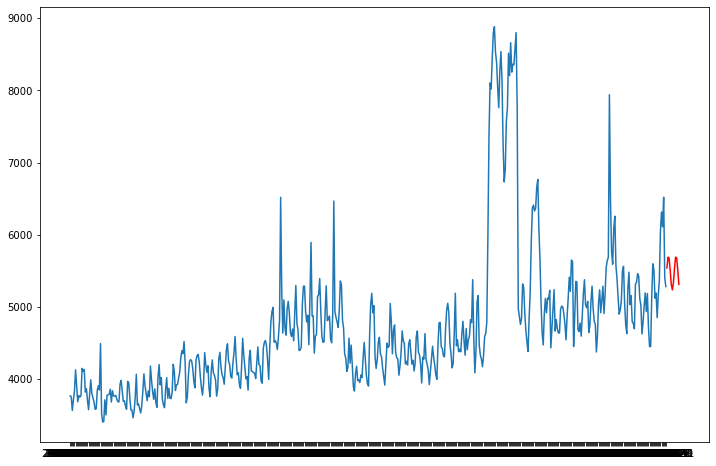

In [35]:
forecast_steps = 12  # Change this to the number of steps you want to forecast
forecast = model_fit.get_forecast(steps=forecast_steps)

# Plot the original time series
plt.figure(figsize=(12,8))
plt.plot(en_lng_all, label='Original Time Series')
forecast_index = range(len(en_lng_all), len(en_lng_all) + forecast_steps)
plt.plot(forecast_index, forecast.predicted_mean, color='red', label='Forecasted Values')


In [36]:
#We will check through partial data traing and see the predicted result with original one
train = en_lng_all[:-20]
test = en_lng_all[-20:]

model = ARIMA(train, order=(4, 1, 3))
fitted = model.fit()

# Forecast
fc= fitted.forecast(20, alpha=0.02)


C:\Users\SAKUMARDASH\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\SAKUMARDASH\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\SAKUMARDASH\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\SAKUMARDASH\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\SAKUMARDASH\AppData\Roaming\Python\Python39\site-packag

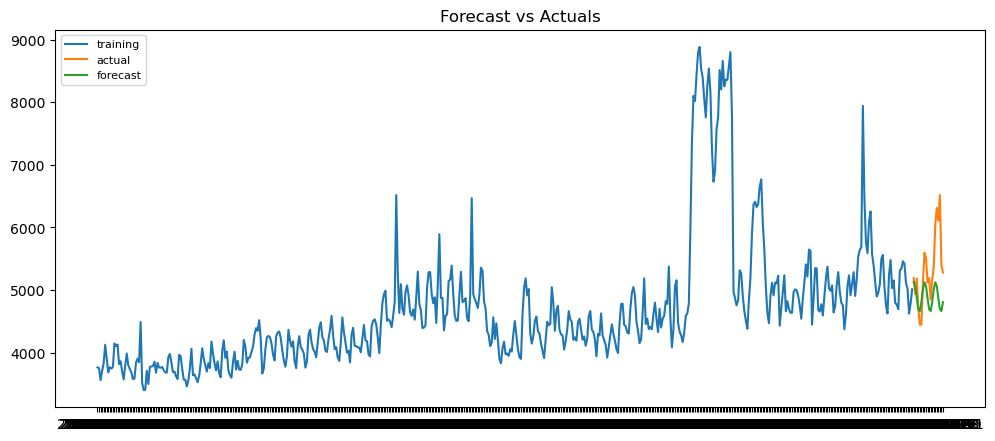

In [37]:

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')

plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)

In the above graph orange is the original graph and green is the forecasted one so from the above we can see the forecasting is not good 

In [38]:
mape = np.mean(np.abs(fc - test.values)/np.abs(test.values))
rmse = np.mean((fc - test.values)**2)**.5
print("mape:",mape)
print("rsme:",rmse)

mape: 0.08969549895292943
rsme: 682.6798814836519


We are getting a mape of 9% which is not good we will try to reduce it below 5% using other models below

In [39]:
#Lets do the same while taking the exogenous factor now 
exog=exog['Exog'].to_numpy()


In [40]:
#Training the SARIMAX model by giving the exogenous data also and as we saw from the graphs above taking the seasonality as 7
import statsmodels.api as sm
train=en_lng_all[:520]
test=en_lng_all[520:]
model=.SARIMAX(train,order=(4, 1, 3),seasonal_order=(1,1,1,7),exog=exog[:520])
results=model.fit()

fc=results.forecast(30,dynamic=True,exog=pd.DataFrame(exog[520:]))


SyntaxError: invalid syntax (3753373213.py, line 5)

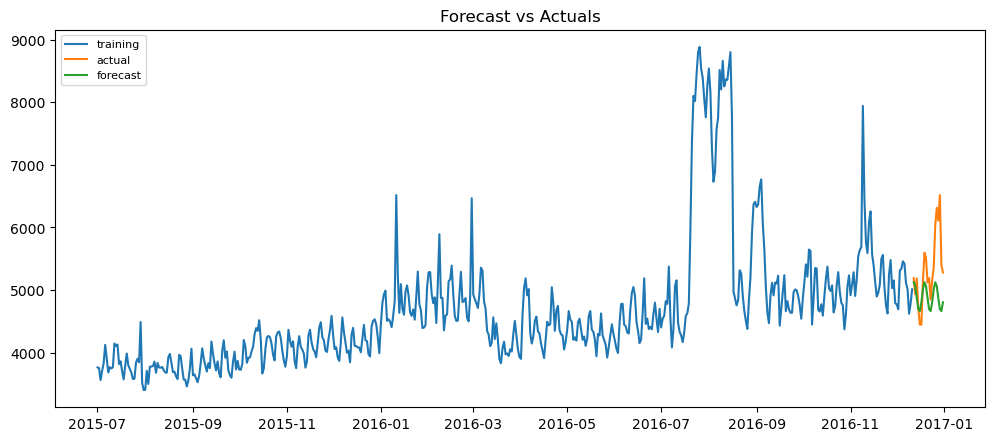

In [41]:

# Make as pandas series
fc_series = pd.Series(fc)
# Plot
train.index=train.index.astype('datetime64[ns]')
test.index=test.index.astype('datetime64[ns]')
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')

plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)

In [42]:
mape = np.mean(np.abs(fc - test.values)/np.abs(test.values))
print("mape:",mape)


mape: 0.08969549895292943


Now we can see from the graph as well from the mape value our model is performing well 

In [ ]:
# Modeling with Prophet
from fbprophet import Prophet

# train_prophet = pd.DataFrame({'ds': train_data['Date'], 'y': train_data.iloc[:, 1:].mean(axis=1)})
model_prophet = Prophet()
model_prophet.fit(train)
future_prophet = model_prophet.make_future_dataframe(periods=12)
forecast_prophet = model_prophet.predict(future_prophet)

In [ ]:
# Plotting the results
fig = model_prophet.plot(forecast_prophet)
plt.title('Prophet Forecast')
plt.xlabel('Date')
plt.ylabel('Mean Views')
plt.show()

In [43]:
#Building the Pipeline
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [58]:
column_names = df_language.columns.tolist()

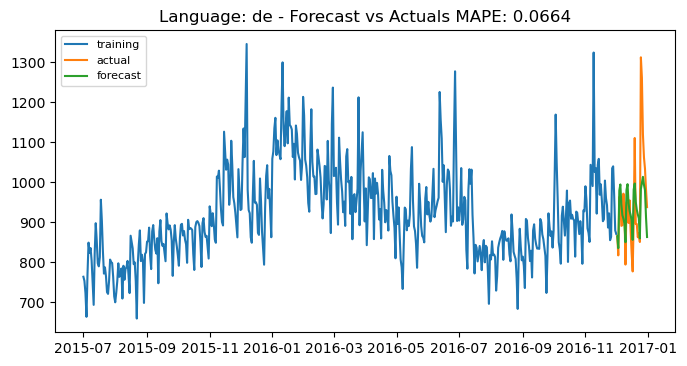

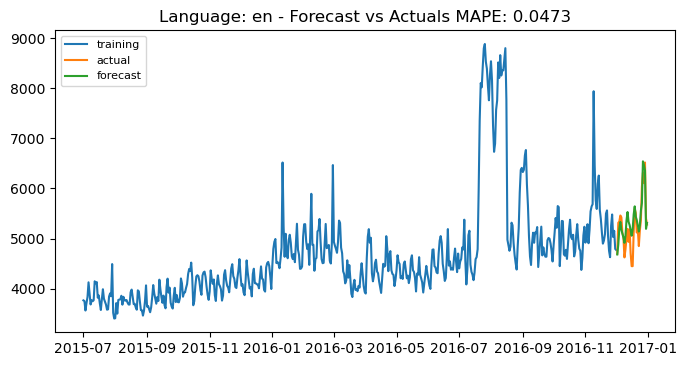

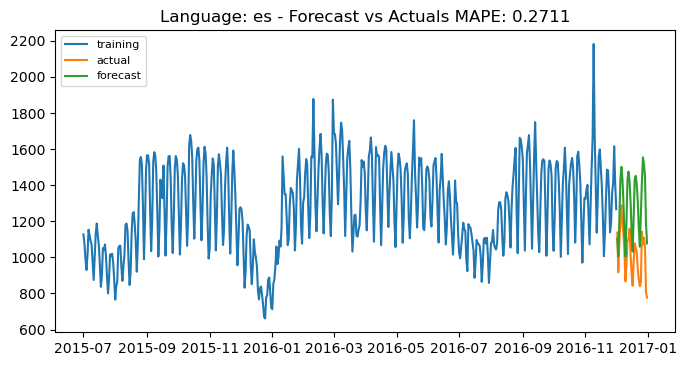

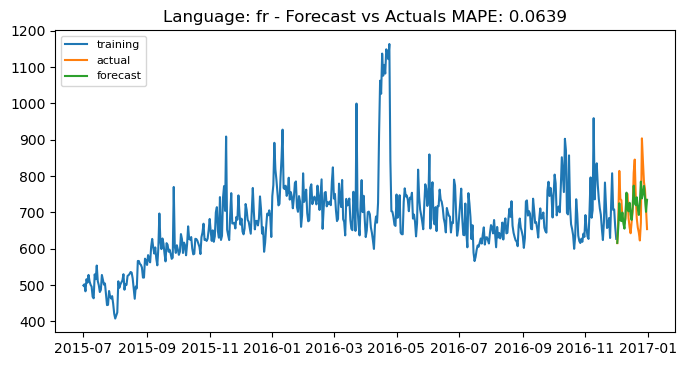

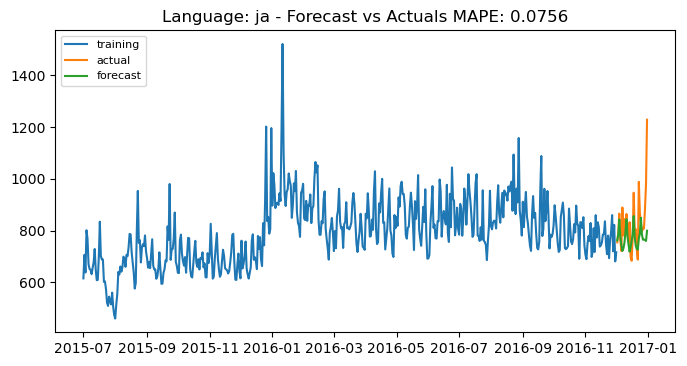

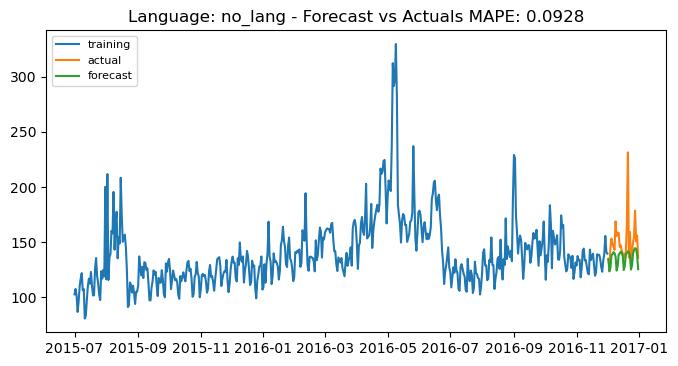

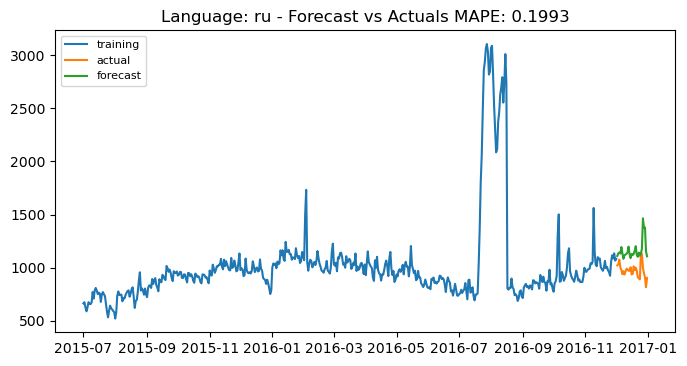

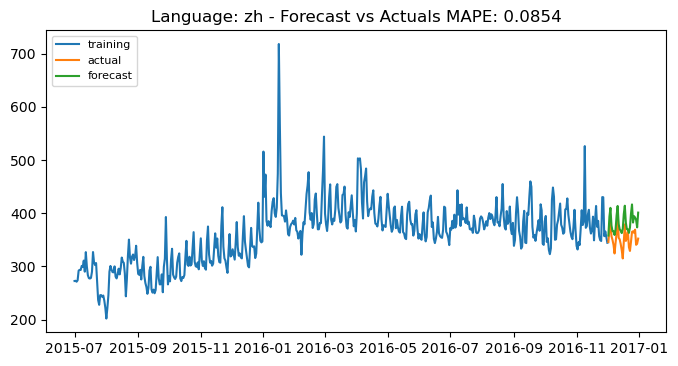

In [73]:
import warnings
warnings.filterwarnings("ignore")

for lang in column_names:
    de_lng_all = df_language[lang]

    train=de_lng_all[:520]
    test=de_lng_all[520:]
    model=SARIMAX(train,order=(4, 1, 3),seasonal_order=(1,1,1,7),exog=exog[:520])
    results=model.fit()
    
    fc=results.forecast(30,dynamic=True,exog=pd.DataFrame(exog[520:]))
    # Make as pandas series
    fc_series = pd.Series(fc)
    # Plot
    train.index=train.index.astype('datetime64[ns]')
    test.index=test.index.astype('datetime64[ns]')
    plt.figure(figsize=(8,4), dpi=100)
    plt.plot(train, label='training')
    plt.plot(test, label='actual')
    plt.plot(fc_series, label='forecast')
    mape = np.mean(np.abs(fc - test.values) / np.abs(test.values))

    plt.title(f'Language: {lang} - Forecast vs Actuals MAPE: {mape:.4f}')
    plt.legend(loc='upper left', fontsize=8)
#     mape = np.mean(np.abs(fc - test.values) / np.abs(test.values))
#     plt.text(0.02, 0.9, f'MAPE: {mape:.4f}', transform=ax.transAxes, fontsize=8, color='red')

As we can see from the above graphs english language en is the best fit model giving a mape score of  0.04